# Determination of lightning length from light curves

In [145]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd
from scipy.signal import find_peaks


/storage/experiments/2021/0605_bourka_radosovice 564.9549943
38.524790396341466 39.65945693597561 39.12291859756099 0.250411027915539
2.3795121951219613 116.95573742378049
0.063 s


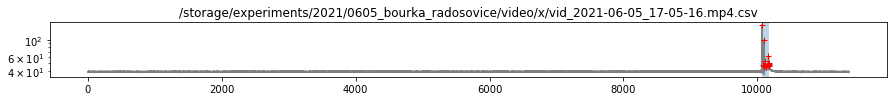

73.849453125 74.63164824695122 74.18692677210369 0.15708073261165417
1.5617206554878038 4.6395217225609855
0.327 s


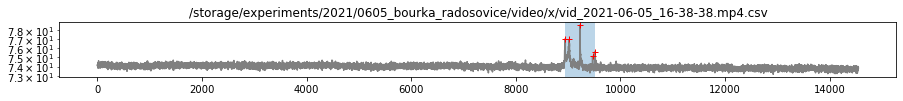

43.28399771341464 44.579182545731705 43.94287900152439 0.25406359916695215
44.0745331554878 44.0745331554878
0.0 s


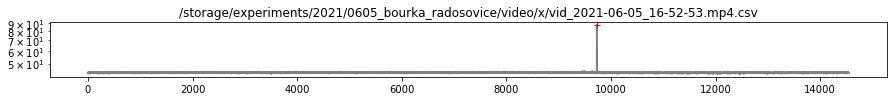

/storage/experiments/2021/0609_bourka_sobeslav 348.1999993
81.67041023456295 81.95971205894145 81.81958926423417 0.058656147634894545
0.5553503408179665 12.581618384121867
0.349 s


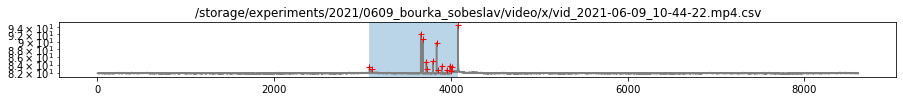

84.62558390136327 84.93857883921413 84.79739250451084 0.058188204004617355
0.4861542702485906 73.69652917000803
0.04 s


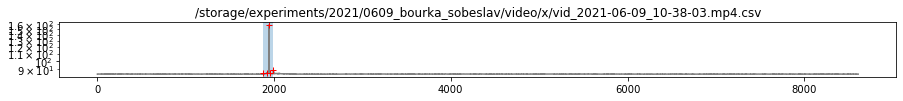

101.91300496190857 102.12564153969528 102.02443247544107 0.04882461932180709
0.39669707297512957 12.245930232558152
0.155 s


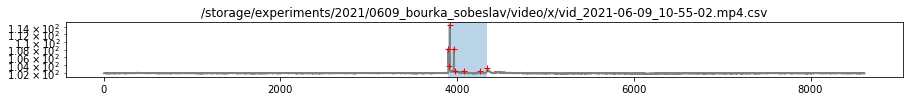

90.77499749398555 91.0341933139535 90.91444982959099 0.051155396803512415
0.4394371491579676 40.3391138732959
0.353 s


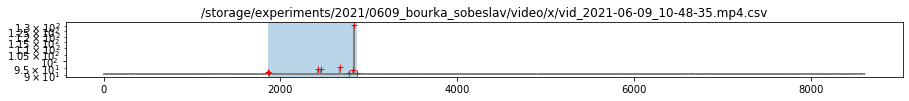

/storage/experiments/2021/0711_bourka_stiavnica 620.2000009
208.70585175304882 209.19901486280492 208.96299706554876 0.09758888881966651
0.8550076219512732 64.53223894817071
0.363 s


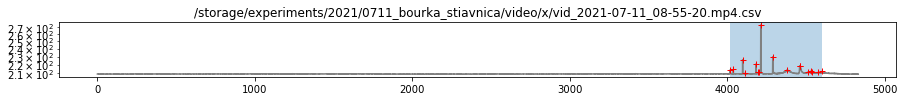

129.7748151676829 130.47735899390244 130.03328227896347 0.15529016823307595
1.2997370426829207 10.068934832317098
0.416 s


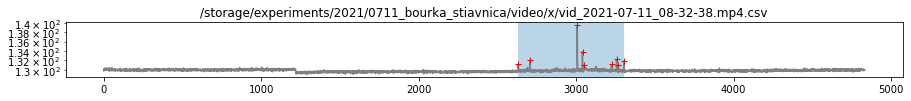

204.1360041920732 205.2603506097561 204.61455693597557 0.24671424123874522
2.1335575457316907 62.266274771341415
0.928 s


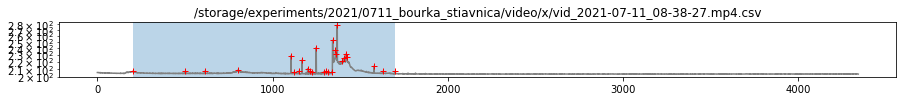

243.87234184451216 244.27857278963413 244.04552107469502 0.08151649388312569
0.6524599847560921 29.841789253048773
0.922 s


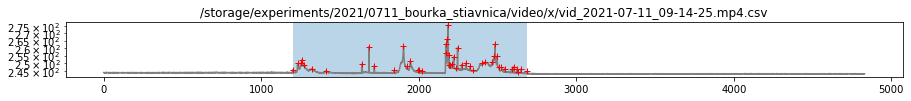

153.97103658536585 154.5966787347561 154.26911330030495 0.13738983497464985
1.1178506097561467 188.1040377286585
1.124 s


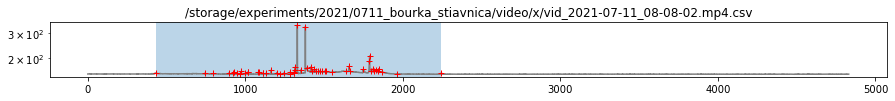

254.73362423780492 255.11650914634143 254.90705564024384 0.07926264332516846
0.6439977134146773 18.613612804878073
0.754 s


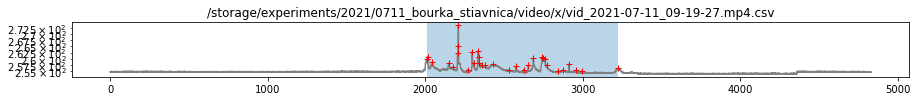

129.36106897865852 129.96319359756095 129.65722618140242 0.130198133779678
1.3104897103658288 10.055207698170733
0.416 s


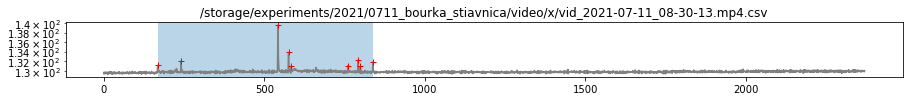

95.84489138719513 96.6775323932927 96.28249523628048 0.18497016317538612
1.498208841463395 153.317587652439
0.548 s


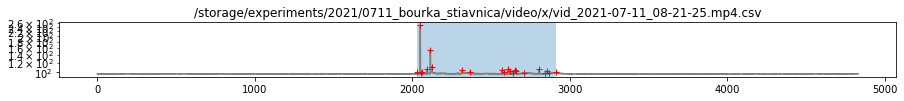

231.75403963414638 232.1702305640244 231.96092189405488 0.08880708300061546
0.7110156250000159 41.14204458841462
1.07 s


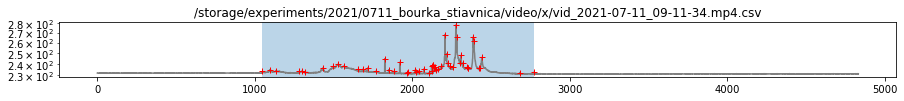

149.78203887195122 150.3867911585366 150.05837721036585 0.12152090443248537
1.2009127286585226 4.625078125000044
0.132 s


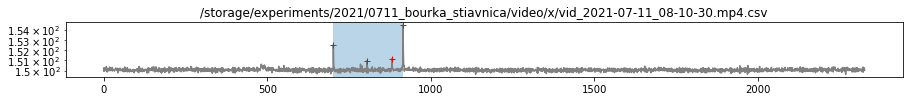

139.57147675304878 140.29516387195122 139.9269267530488 0.14778710834432646
1.47526105182925 56.72655106707322
0.373 s


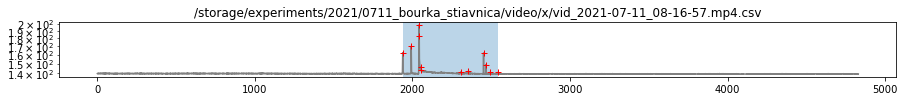

128.71231580793906 129.75146476543705 129.1717212184242 0.1866581979239051
1.5452097534081872 221.60693038291905
0.316 s


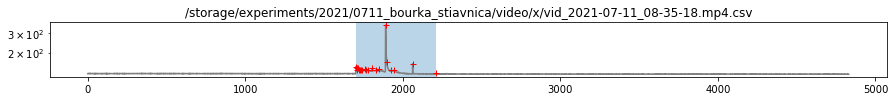

209.6165663109756 210.09008765243905 209.87560847942063 0.09307098184049416
1.049733231707279 8.634113948170693
0.017 s


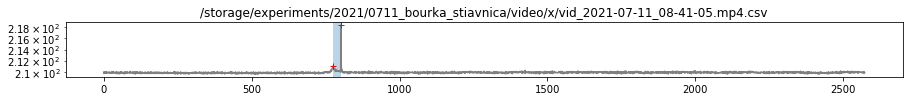

196.48657393292683 210.0909984756097 200.45017917301828 5.933398512372652
52.52808498475608 97.71853277439021
0.078 s


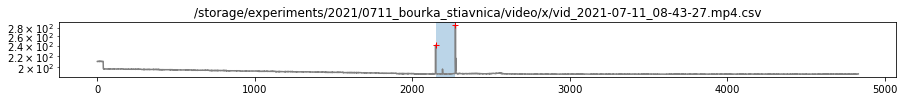

145.80700457317073 146.49409298780492 146.1339509908536 0.15405590400540634
1.362665777439048 50.67992759146344
0.608 s


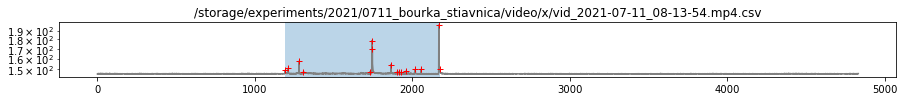

245.7564100609756 246.21779344512197 245.9600026105183 0.09024887642136918
0.763761432926799 32.72596417682925
0.454 s


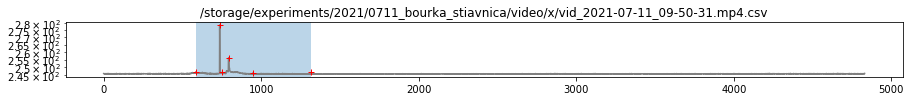

254.6786985518293 255.02631669207318 254.85456244283552 0.07849521222889633
0.6634870426829025 18.680815548780487
0.754 s


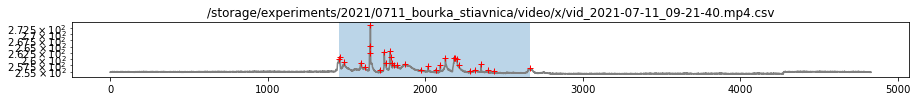

237.16615663109758 237.57703887195126 237.38401263338415 0.08383366274190382
0.9200457317073472 41.183384146341496
0.263 s


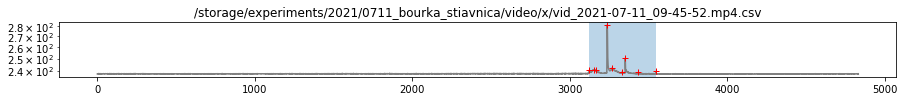

135.45794969512195 136.14833841463414 135.7934903772866 0.13205163517812704
1.0730049542682991 84.14782964939022
0.432 s


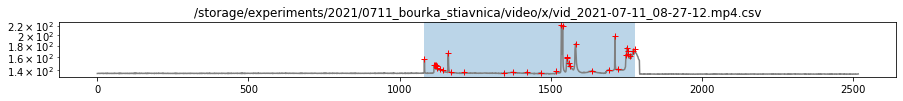

185.7969855182927 186.42313833841462 186.06625960365847 0.10843010399350143
1.109355945121962 144.60092035060973
0.647 s


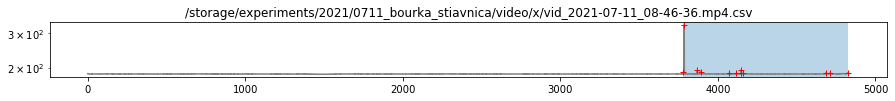

214.41238948170727 214.89071836890244 214.65342116996948 0.1013795705281274
1.0217473323170623 60.815041920731744
0.306 s


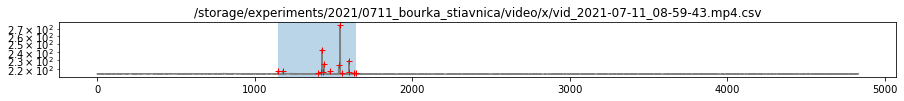

/storage/experiments/2021/0714_bourka_martin 620.2000009
112.89933841218924 113.74190181435443 113.33773513933438 0.20676602512414108
1.9697473937449956 89.91146626904569
0.736 s


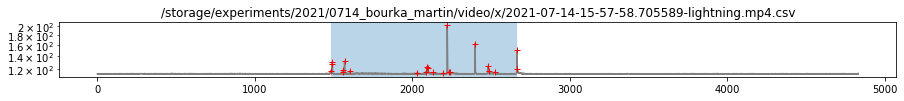

152.49858911387332 153.20651438452285 152.86524196822373 0.15640163530293358
1.278114975942259 9.682449127907006
0.693 s


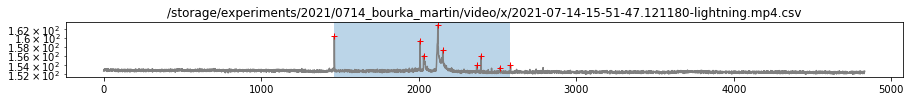

141.9634773456295 142.6349175521251 142.2668464063753 0.15360247916381312
1.4850553829190005 73.46360640537284
1.221 s


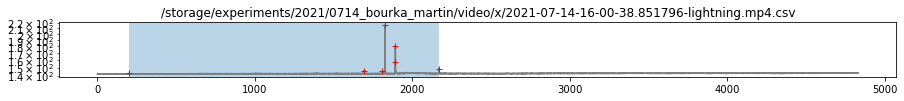

124.10647679430632 124.92406901563751 124.53400395950277 0.17739830272563875
1.42932788692859 72.14896752205296
0.825 s


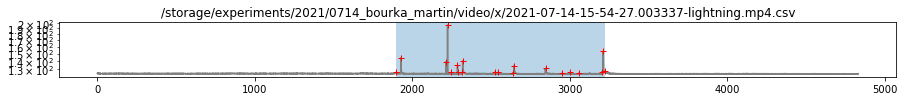

/storage/experiments/2021/0714_bourka_sobeslav 620.2000009
111.18317835365852 111.94350228658536 111.52718231707318 0.2180520062201364
1.8922522865854035 21.494182545731732
0.543 s


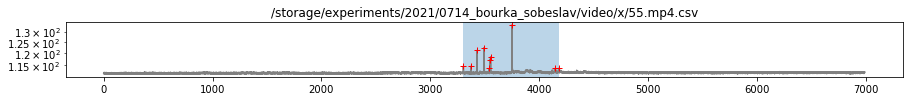

/storage/experiments/2021/0725_bourka_ratmirov 620.2000009
0.1248897353648757 0.14511327185244588 0.13115230302726544 0.0031727981123804757
0.02765136327185244 146.89741254009624
0.465 s


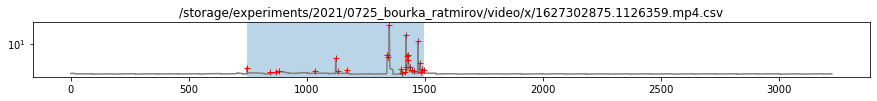

0.41222559141940657 0.4490226543704892 0.4298878809141942 0.006987121925414776
0.05630262630312749 4.4401413392141125
0.363 s


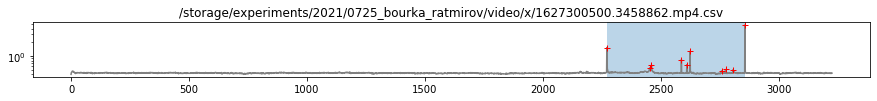

0.12443865276663993 0.14188803127506014 0.12865969576984768 0.0028596793777847483
0.02428327987169207 9.721957698476345
0.343 s


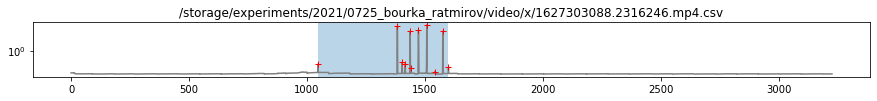

1.6591795308740978 1.7512793203688852 1.6932992306535686 0.014258897110023325
0.12152917000801944 49.66237469927826
0.618 s


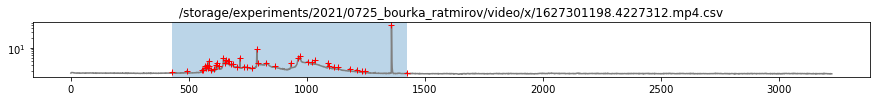

0.8064567461908579 0.8477608761026464 0.8268978924418603 0.008106944317311094
0.06559868684843617 273.30736016439454
1.102 s


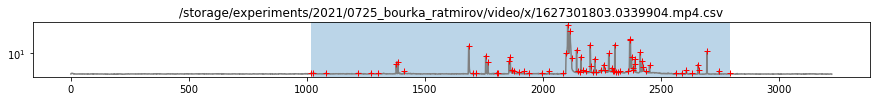

0.4056097133119487 0.4530974338412189 0.42729216369286294 0.008743021739127388
0.07251904570970313 85.50713838211708
0.729 s


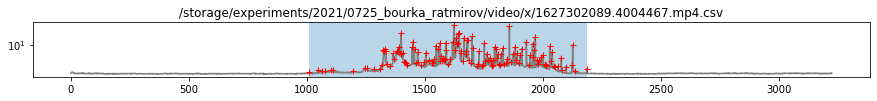

2.093485615477145 2.1949641639935846 2.1319968674819574 0.018136040141333885
0.14755663592622348 45.49044707297514
0.923 s


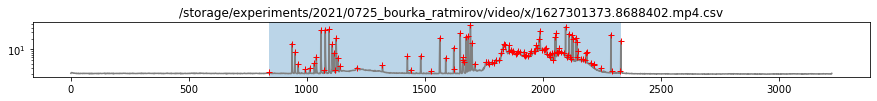

0.9921636928628708 1.0580631014434645 1.0256469150962308 0.013171412776917382
0.10953413191660033 73.49761678027265
0.605 s


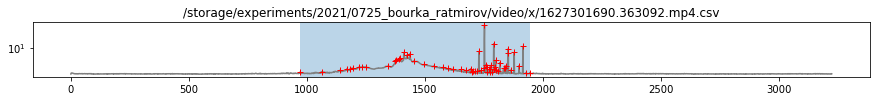

0.4693702385725742 0.5176435946271051 0.4885215893143544 0.008515608093763942
0.07157177225340822 134.7683803628709
1.145 s


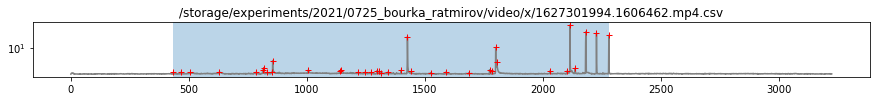

1.4625263131515638 1.5158254811547716 1.485079691259022 0.009873544770007927
0.07985289695268638 27.19404445669607
0.564 s


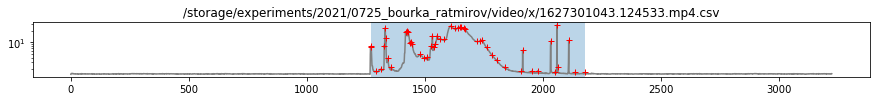

0.12879159983961508 0.15171411387329592 0.13939309342421813 0.004093407374754755
0.03990201483560549 52.67605002004811
0.6 s


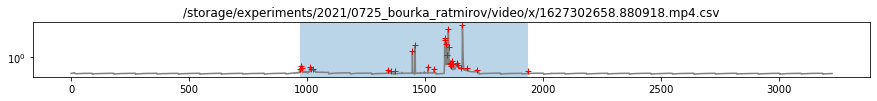

0.2503433239775461 0.2943877806736167 0.26535020298716916 0.007735829103076501
0.06192988171611857 170.0485953789094
1.134 s


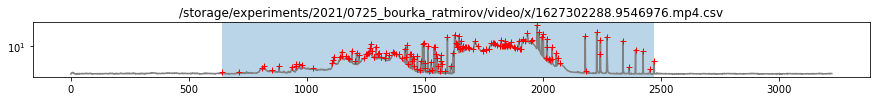

0.12369060745789895 0.14330142341619884 0.12879013382117077 0.002731570985867805
0.023196922614274196 256.9830342822775
1.424 s


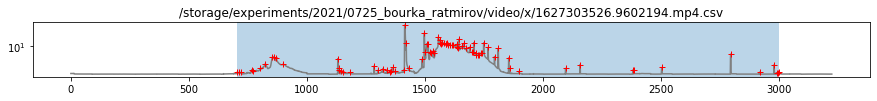

1.1609061748195673 1.2319479250200478 1.181388331996792 0.013567630139262363
0.11021827385725791 96.71327811748198
0.914 s


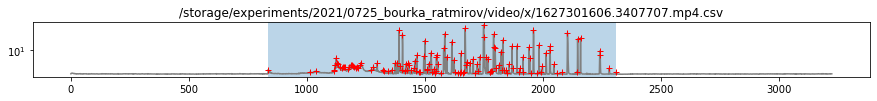

0.3237645348837209 0.3563890838011227 0.3349564204089814 0.006804327631201693
0.05531024458700884 157.46866479550923
0.571 s


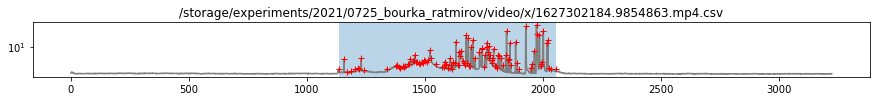

0.12126227947072975 0.14271877506014435 0.12874333400160384 0.0030669298098460556
0.09023531475541297 121.6320807437851
0.806 s


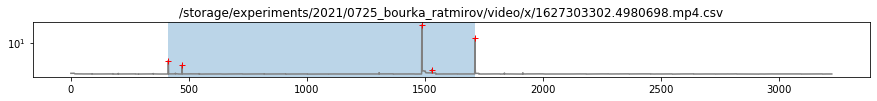

2.7337184242181234 2.8365502205292703 2.7909616705092226 0.018357890496405377
0.14694767441860357 116.68676072574178
1.42 s


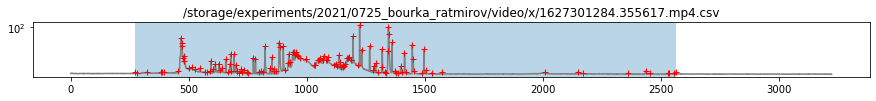

1.4247030372894949 1.5191446972734564 1.465455869085806 0.018424248732996983
0.15012028869286276 215.54821822373694
0.708 s


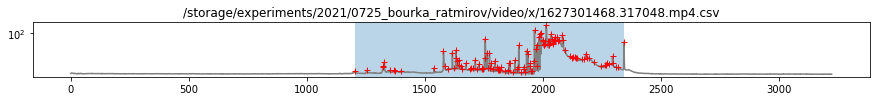

0.12531074578989576 0.140625 0.13654240176423418 0.003944642020004648
0.03248546511627906 167.09415472133117
0.785 s


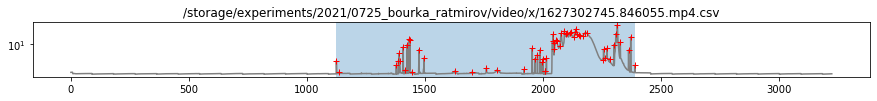

/storage/experiments/2021/0726_bourka_zabori 620.2000009
86.91989900761827 87.26654846631916 87.07758816158783 0.06046430992713876
0.48967271451482475 7.039174017642338
0.497 s


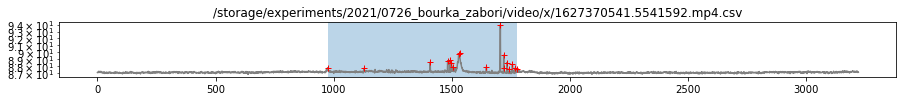

115.39647278468323 115.66210404971932 115.5434607934042 0.05486832183919195
0.4545709703287599 19.34175646551725
0.458 s


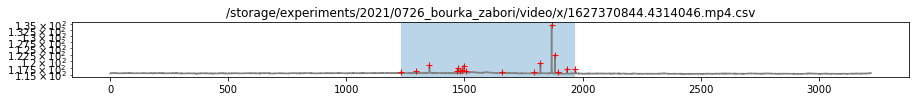

126.05718223736969 126.3970353849238 126.20509947624298 0.0563133244937197
0.6269333901363154 0.9759021651964872
0.104 s


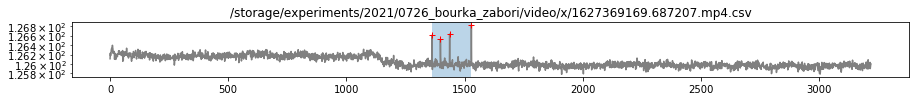

152.09586131716117 152.36144747393746 152.26581649709308 0.048192968027398926
0.4084289795509335 1.730146100641491
0.277 s


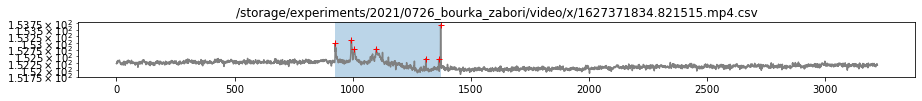

61.820565607457894 62.302927024859656 62.056792151162796 0.08985343801211025
0.7664870689655032 5.291191359262228
0.112 s


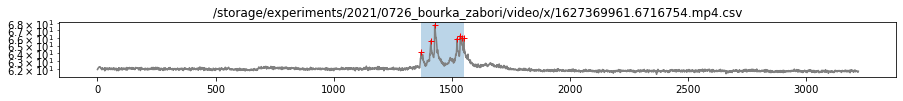

60.20046110665597 60.57064955894146 60.403575030072176 0.0775411956820878
0.6492093524458582 3.0744399057738576
0.539 s


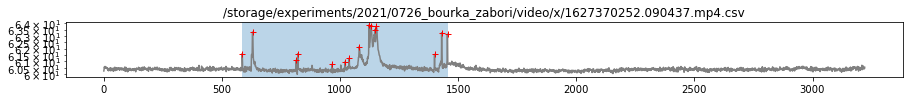

/storage/experiments/2021/0803_bourka_votice 620.2000009
/storage/experiments/2021/0807_bourka_sobeslav 620.2000009
189.55084327385723 189.9187312048917 189.715206420409 0.0782839650045247
0.636387329591031 71.14601794306338
0.961 s


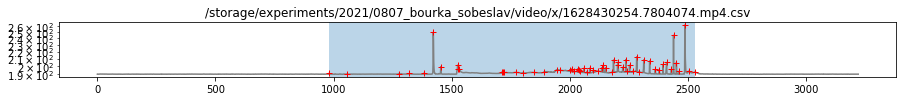

189.5441108660786 189.86910460104252 189.69236498847238 0.06396356284298828
0.5502042401764129 43.72906350240581
0.776 s


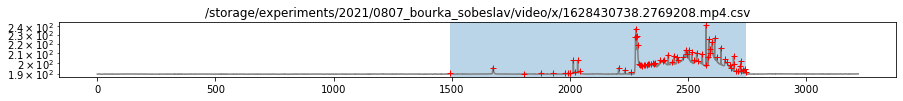

189.8107683440257 190.15488422213315 190.01883026764236 0.0618398721333916
0.5108660785886343 6.3369211106656
0.897 s


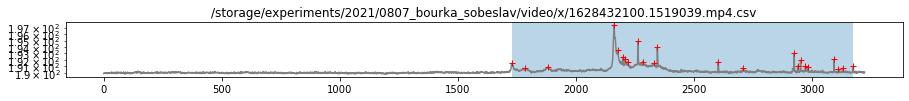

189.79581119687248 190.13480728749002 189.92635904921804 0.05827599462824607
0.4857332598236326 49.59847509021648
0.484 s


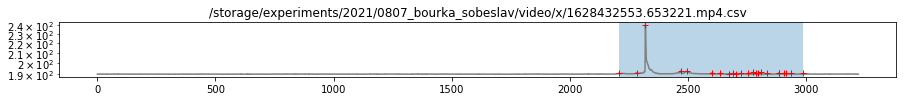

189.88785836006412 190.25936622894952 190.0551235841018 0.05936122171502883
0.47680558340019275 51.93815031074578
0.897 s


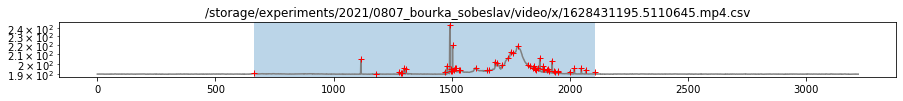

189.66103523456292 189.97229350441054 189.82722609262228 0.05812144250360986
0.5087798215717214 86.82249899759424
0.605 s


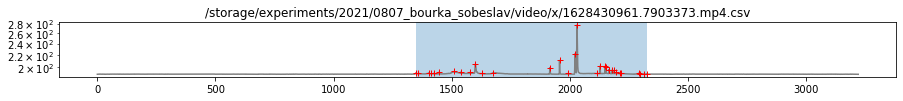

189.81567010825984 190.15418504410584 189.97883833700894 0.06773256033634512
0.5450618985564688 266.205350340818
1.35 s


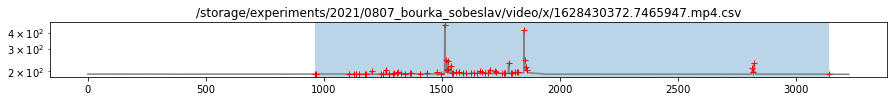

190.01543579591015 190.3612319566961 190.18852066208908 0.07133643226209292
0.6333500400961896 41.77528944466721
1.187 s


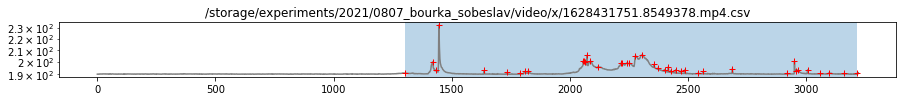

0.12831044506816358 0.14330142341619884 0.13686804580994383 0.002992901688197655
1.2199040196471531 1.2199040196471531
0.0 s


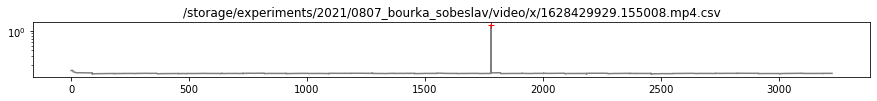

189.85992507016843 190.35123671812352 190.0996494211107 0.07378106141843714
0.6940131315156179 2.887334603047293
0.382 s


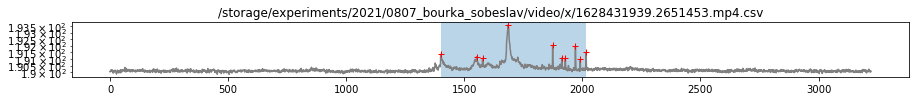

0.12674669206094627 0.15037966118684842 0.13471529170008018 0.002474699089071606
0.027361918604651175 22.938001202886927
0.208 s


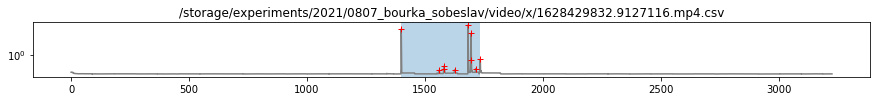

189.96511377305526 190.20899533881317 190.08491337961107 0.05669970685652382
0.4647579190056206 410.3459828588613
0.859 s


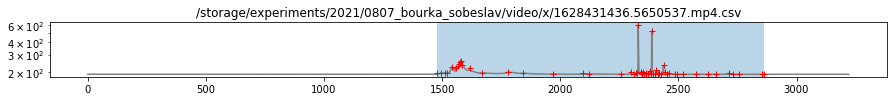

0.1230365376904571 0.14723711908580595 0.13693006966720125 0.0028373015391775377
0.05566735164394543 123.76216043504411
0.33 s


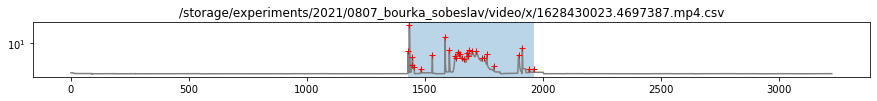

189.4531463011227 189.75250350842018 189.58537642842822 0.05779616046003075
0.47760625501200593 46.70080693664792
1.252 s


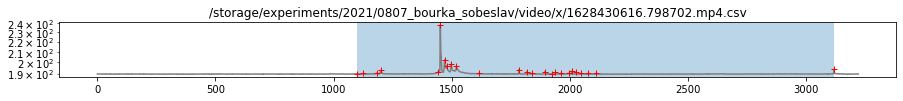

189.88801999799517 190.20372894947877 190.0404742632318 0.06833122311640033
0.6714702786688065 16.10161512630313
0.667 s


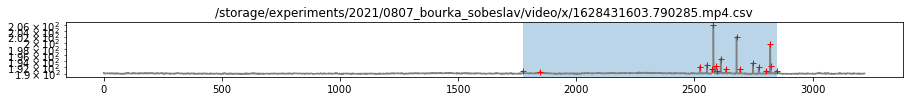

189.66620764835602 189.9417702485966 189.78245937750606 0.055217881285228025
0.45375526263032384 33.188154069767535
0.566 s


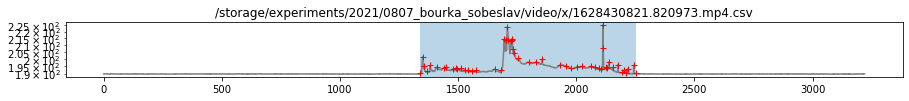

190.2496303628709 195.740797914996 192.09112022604248 1.6674656940490598
0.13320845028067366 0.14360214514835604 0.13878037289494777 0.0026628900999548315
0.02956094627105052 64.4819003107458
0.718 s


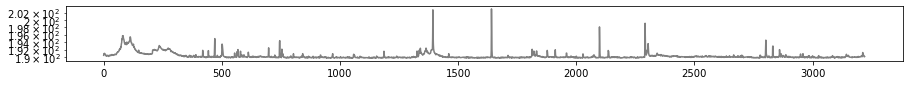

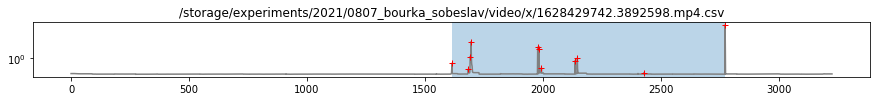

0.12956971732157174 0.14923691860465116 0.13610981355252605 0.0024738598072608286
0.026388331996792302 158.30477270449077
0.478 s


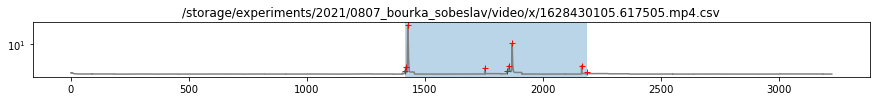

/storage/experiments/2021/0815_bourka_veseli_auto1 620.2000009
89.72101669005613 90.49894997995187 90.09263778067361 0.14765592871997024
1.2015186447473951 34.08146677024858
0.54 s


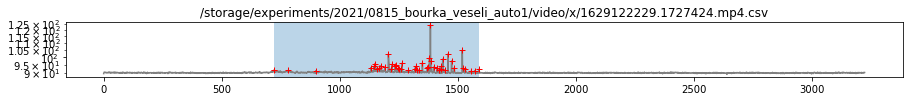

76.09263482357659 76.88136778267842 76.46452934542906 0.17348749499221985
1.544382768644752 51.48989825581394
0.786 s


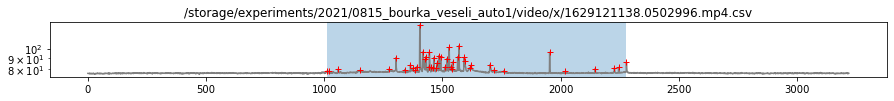

87.79102220328791 88.53184267241379 88.23922302275462 0.14192351202931475
1.167634823576563 68.75002506014434
0.556 s


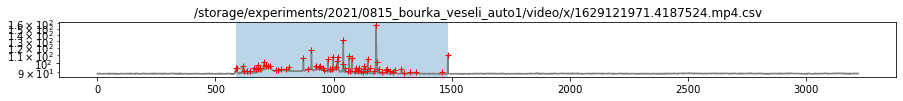

82.4148506415397 101.08484738372091 84.22795282427829 2.676701410006263
24.531984262229344 24.531984262229344
0.0 s


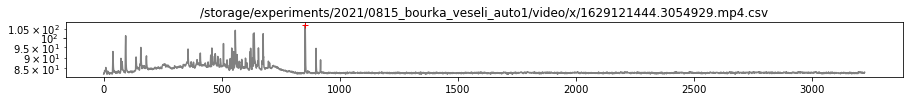

70.3421436447474 71.1574228147554 70.80536374799519 0.18360275272034957
1.475130312750622 54.68060470128306
0.718 s


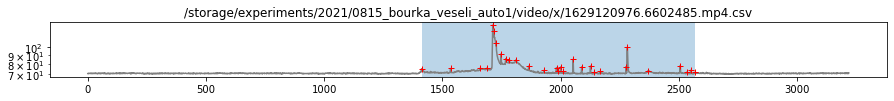

/storage/experiments/2021/0815_bourka_veseli_auto0 620.2000009
0.10003759021651963 0.10798416198877306 0.10455139835605452 0.0024278568949546086
0.01984888732959099 54.1445957798717
0.323 s


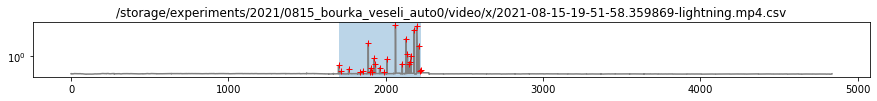

0.09982457898957496 0.11260149358460304 0.1026361768243785 0.0017983528801716712
0.015346832397754598 67.87071596832398
0.555 s


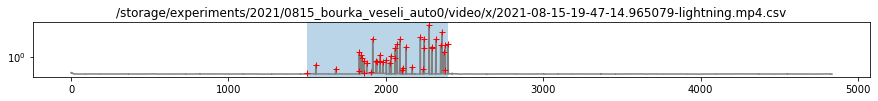

0.097478949478749 0.1043391639935846 0.10322178227746592 0.0007851207869657728
0.0074666700080192605 356.9622970128308
0.351 s


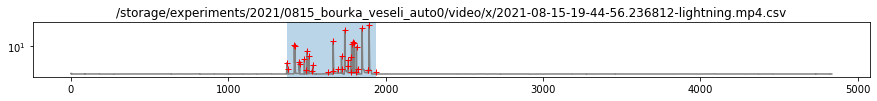

0.09682112068965518 0.1123721932638332 0.10057883921411388 0.0017531557508530709
0.016771501603849243 4.0054317862870885
0.294 s


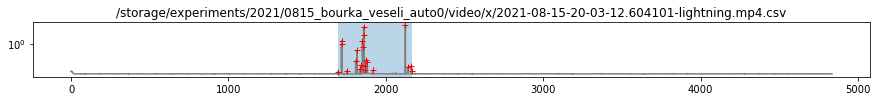

0.09699779470729752 0.10153869286287087 0.10017320318765036 0.0007127422034015551
0.3306435445068163 0.747369937850842
0.113 s


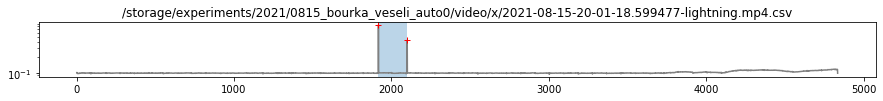

0.09653167602245387 0.10206495589414596 0.1003142542101042 0.0007815872743185052
0.007008069366479561 116.75338311948677
0.536 s


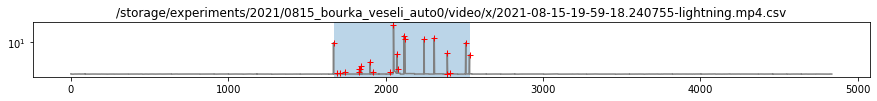

0.0977120088211708 0.1054255212510024 0.10141722634322373 0.0009344297967235256
0.09661938652766637 52.121842421812346
0.441 s


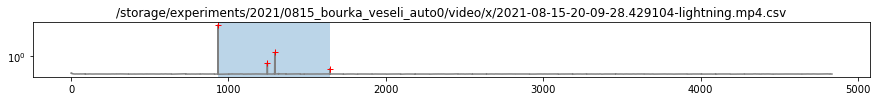

0.10417126102646353 0.11435069165998395 0.1102851969727345 0.0017606033649368862
0.016446972734562942 104.84932462910986
0.282 s


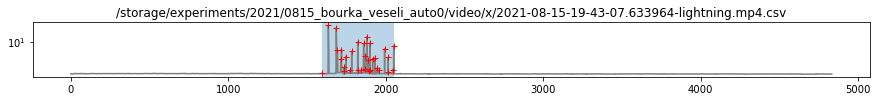

0.09889359462710504 0.11111292101042504 0.10187132868885326 0.0018957200546104963
0.034104350441058556 104.53335129310345
0.239 s


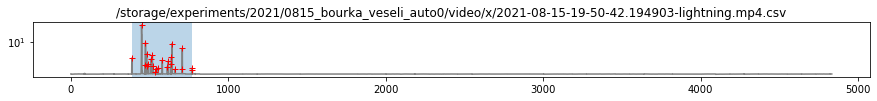

0.0994825080192462 0.10499323376102647 0.10290909432638332 0.0010761418772885834
0.025220529270248607 14.229176273055334
0.408 s


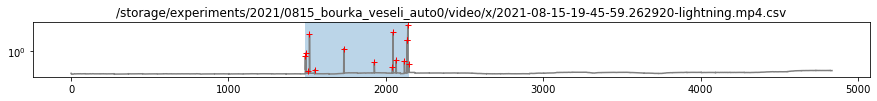

0.1032816259021652 0.13401288091419405 0.1194375626503609 0.006303686912804548
0.06163667802726544 57.2292890437049
0.333 s


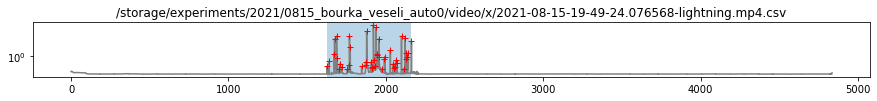

0.09874949879711307 0.10942887931034484 0.1013714414595028 0.0016618978339933929
0.013804380513231754 2.5929631114675225
0.471 s


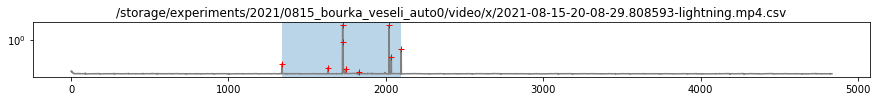

0.09881716118684844 0.10185820970328788 0.10039554931836409 0.0007416494376529774
0.0064504811547714536 0.19801523656776265
0.306 s


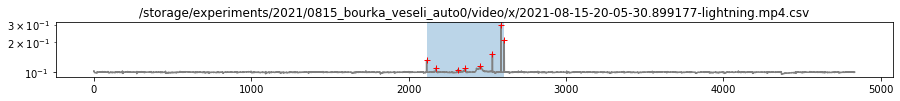

0.09684367481956696 0.11601092622293505 0.10070475390938256 0.0017006642536067944
0.013699127906976777 117.37117331595827
1.346 s


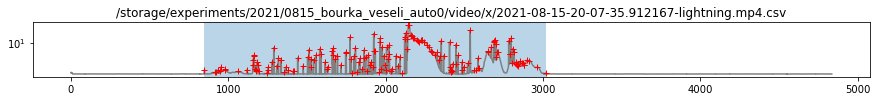

0.09314855653568564 0.10384046712109063 0.10204805282678428 0.0011581847947876808
0.00955418003207699 101.70874974939854
0.618 s


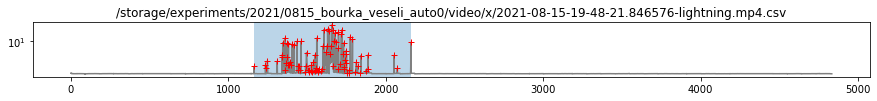

0.09691509623095428 0.10563226744186048 0.10380237570168405 0.0012702228499795437
0.012961106655974358 3.231186096631917
0.5 s


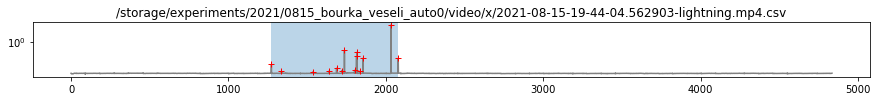

0.09998621692060948 0.10744411587810744 0.10495028067361668 0.000796358930247127
0.01239725340817964 0.9308891339214113
0.092 s


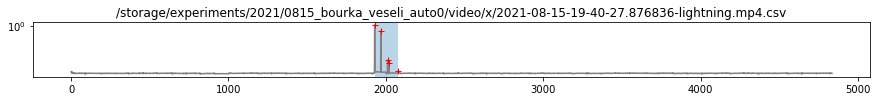

0.09525736768243784 0.110473887329591 0.10276171561748194 0.002135235191469723
0.01793429230152363 25.392196271050526
0.384 s


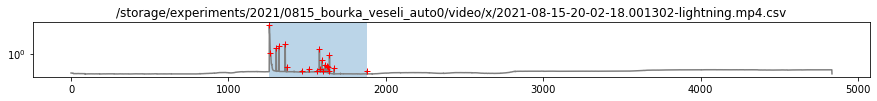

0.09973436246992784 0.10718724939855652 0.10492880412991179 0.0014373626982911772
0.012350892141138742 1.8512755613472334
0.582 s


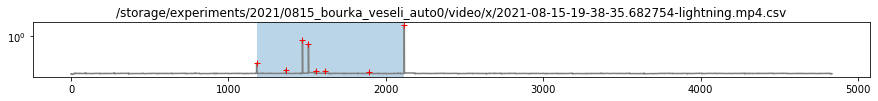

0.09868559542902967 0.1047113071371291 0.10052011076583803 0.0010751286066283516
0.009575481154771429 11.35993258821171
0.647 s


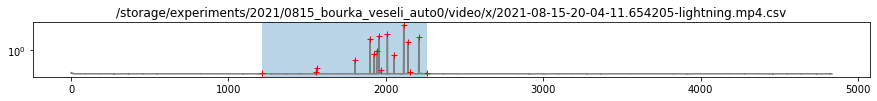

0.09899383520449076 0.10570744787489976 0.10390989625100243 0.0007047263874070685
0.005983109462710495 0.7715391940657579
0.859 s


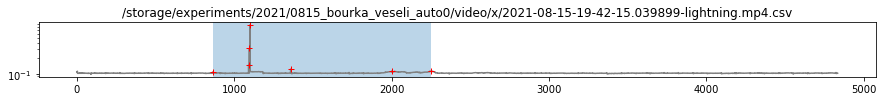

0.10898531475541301 0.1146839915797915 0.1131655347834804 0.0008027421055415315
1.475423516439455 21.301818113472333
0.964 s


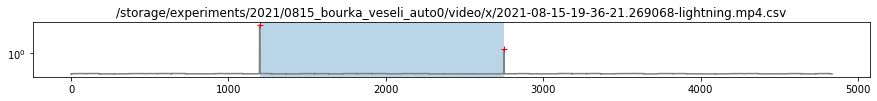

0.09824954891740176 0.10586908580593424 0.10418072123095429 0.001579653972077416
0.013502405773857237 12.9520762329591
0.578 s


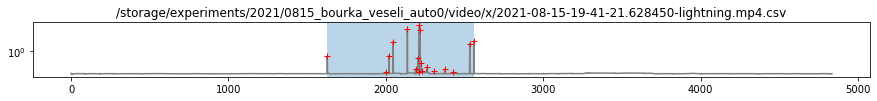

0.09760425020048116 0.10132818765036086 0.10017540848035285 0.000631575063051302
0.006384071772253391 1.5479839113873293
0.301 s


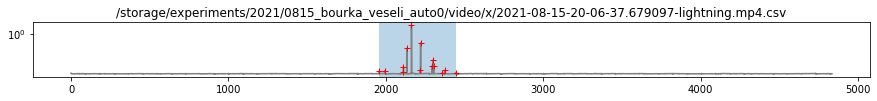

/storage/experiments/2021/0816_bourka_sobeslav 620.2000009
147.50662214314355 147.6482808740978 147.59355662339613 0.021064848356720404
0.2853398155573075 1.5423641740176208
0.298 s


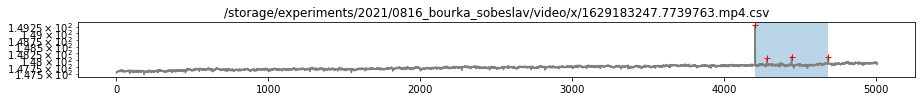

125.24364349438652 125.80443689855652 125.56267884172016 0.11192354397983552
1.018848987570152 4.782396501603841
0.094 s


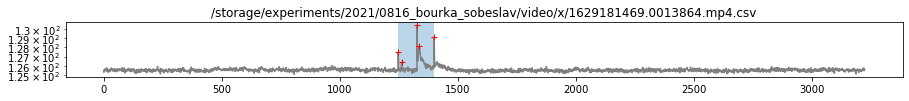

125.77566534683241 126.34372493985563 126.05355884121894 0.13086751936814148
2.143424218123471 109.69015011026463
0.049 s


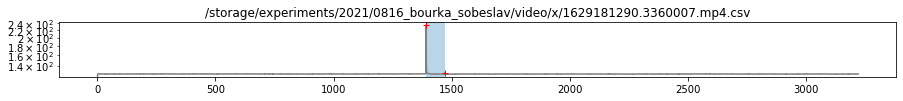

133.8012818263833 134.29373997594226 134.04414826834397 0.10714447936345207
1.6167627305533472 5.0287477445870366
0.161 s


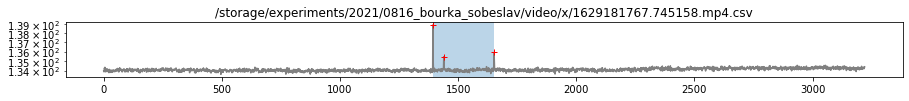

/storage/experiments/2021/0822_bourka_sobeslav_auto0 620.2000009
110.8609224639134 111.13892466920609 111.01256935394952 0.060492029857800264
0.6998195669607128 25.864058740978336
0.259 s


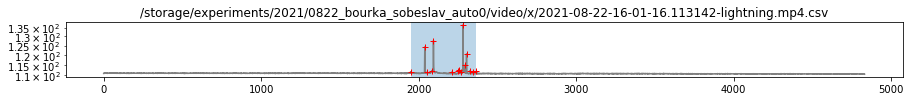

98.27276338211708 108.39787740577385 98.80984530372898 1.3246726262858566
50.117440607457894 50.117440607457894
0.0 s


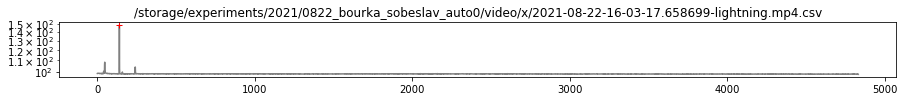

In [156]:
'''
d = [{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009}
#"/storage/experiments/2021/0713_bourka_exit29_D8",\
#"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky
    ]
'''
d = [\
{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'snap':564.9549943},\
{'dir':"/storage/experiments/2021/0609_bourka_sobeslav",'snap':348.1999993},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0714_bourka_martin",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0714_bourka_sobeslav",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0725_bourka_ratmirov",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0726_bourka_zabori",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0803_bourka_votice",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0807_bourka_sobeslav",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto1",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto0",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0816_bourka_sobeslav",'snap':620.2000009},\
{'dir':"/storage/experiments/2021/0822_bourka_sobeslav_auto0",'snap':620.2000009}]
#'''

files = pd.DataFrame( columns=['name', 'duration'])

WINDOW_SIZE = 100

for directory in d:
    print(directory['dir'],directory['snap'])

    for f in glob.iglob(directory['dir'] + "/video/x/*.csv"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        ss = f.split('.')
        sss= (ss[0]+'.'+ss[1]).split('/x')
        ff = sss[0]+sss[1]
        
        snap = directory['snap'] 
        
        # Import light curve
        light_curve = pd.read_csv(f, names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        #signal_samples=light_curve[["illuminance"]].to_numpy()
        maximum = max(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        minimum = min(light_curve["illuminance"].iloc[10:10+WINDOW_SIZE])
        amplitude = maximum - minimum
        stddev = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].std()
        avg = light_curve["illuminance"].iloc[10:10+WINDOW_SIZE].mean()
        print(minimum, maximum, avg, stddev)
        peaks, properties = find_peaks(light_curve["illuminance"], prominence = 8*stddev, wlen=WINDOW_SIZE)
        #xx = light_curve["illuminance"].rolling(100).mean()
        try:
            print(properties["prominences"].min(), properties["prominences"].max())

            peaks = peaks[peaks > 100]
            files = files.append({'name':f,'duration':round((peaks[-1] - peaks[0]) * snap /1000000, 3)}, ignore_index=True)
            print(round((peaks[-1] - peaks[0]) * snap /1000000, 3), 's')
        except:
            pass        
        
        #peaks, _ = find_peaks(light_curve["illuminance"], prominence = properties["prominences"].max())
        
        try:
            plt.figure(figsize=(15,1))
            plt.yscale('log')
            #plt.plot(signal_samples,c='gray')
            plt.plot(light_curve["illuminance"],c='gray')
            #plt.plot(xx,c='red')
            #plt.ylim(minimum,minimum+(maximum-minimum)/5)
            plt.plot(peaks,light_curve[["illuminance"]].iloc[peaks], ls='', marker='+', color='red')
            plt.axvspan(peaks[0],peaks[-1],alpha=0.3)
            #plt.plot(light_curve["illuminance"].loc[light_curve["illuminance"]>(avg+stddev/2)], color='red')
            #plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
            plt.title(f)
            plt.show()
        except:
            pass

In [164]:
print(files.loc[files['duration']<0.1].iloc[1].iloc[0])
files.loc[files['duration']<0.1]
max(files['duration'])
len(files.loc[files['duration']>0])

/storage/experiments/2021/0605_bourka_radosovice/video/x/vid_2021-06-05_16-52-53.mp4.csv


107

Text(0, 0.5, 'Events [-]')

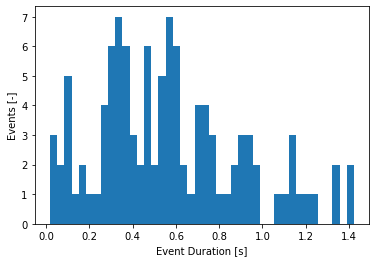

In [183]:
plt.hist(files.loc[files['duration']>0,'duration'],bins=3*14)
plt.xlabel('Event Duration [s]')
plt.ylabel('Events [-]')

In [34]:
'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky

'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]
#'''

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

window_size = 100
threshold = 5

for directory in d:
    print(directory)

    for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        
        # Import light curve
        light_curve = pd.read_csv(f+'.csv', names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        vcap = cv2.VideoCapture(f)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        signal_samples=light_curve[["illuminance"]].to_numpy()
        if len(signal_samples) > 0:
            start_sample = signal_samples[:window_size]
            start_noise_std = np.nanstd(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            start_noise_mean = np.nanmean(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            
            end_sample = signal_samples[-window_size:]
            end_noise_std = np.nanstd(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            end_noise_mean = np.nanmean(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            #print(start_noise_std, start_noise_mean, end_noise_std,end_noise_mean)


            for sample_num in range(0,len(signal_samples)):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / start_noise_std
                if z_score > threshold:
                    event_start = sample_num
                    break

            for sample_num in reversed(range(0,len(signal_samples))):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / end_noise_std
                if z_score > threshold:
                    event_end = sample_num
                    break
            '''
            try:
                plt.figure(figsize=(15,1))
                plt.tight_layout()
                plt.plot(signal_samples,c='gray')
                plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
                plt.show()
            except:
                pass
            '''

        else:
            event_start = float("NaN")
            event_end = float("NaN")
        
        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length, 'event_start':event_start, 'event_end':event_end}, ignore_index=True)
        vcap.release()
files

/storage/experiments/2021/0605_bourka_radosovice
/storage/experiments/2021/0609_bourka_sobeslav
/storage/experiments/2021/0711_bourka_stiavnica
/storage/experiments/2021/0714_bourka_martin
/storage/experiments/2021/0714_bourka_sobeslav
/storage/experiments/2021/0725_bourka_ratmirov
/storage/experiments/2021/0726_bourka_zabori
/storage/experiments/2021/0803_bourka_votice
/storage/experiments/2021/0807_bourka_sobeslav
/storage/experiments/2021/0815_bourka_veseli_auto1
/storage/experiments/2021/0815_bourka_veseli_auto0
/storage/experiments/2021/0816_bourka_sobeslav
/storage/experiments/2021/0822_bourka_sobeslav_auto0


,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9520.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,1055.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,4516.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4149.0,3076.0
...,...,...,...,...,...,...
191,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1649.0,485.0
192,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,1683.0,462.0
193,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1683.0,462.0
194,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN


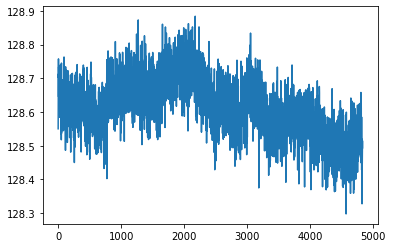

In [83]:
plt.plot(light_curve['frame'],light_curve['illuminance'])

In [84]:
light_curve

,frame,illuminance
0,0,128.550090
1,1,128.662144
2,2,128.653799
3,3,128.712568
4,4,128.702863
...,...,...
4828,4828,128.450104
4829,4829,128.477717
4830,4830,128.483539
4831,4831,128.514541


In [85]:
files

,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9918.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,10061.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,7371.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4125.0,3076.0
...,...,...,...,...,...,...
201,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,2366.0,485.0
202,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,4277.0,1115.0
203,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,4277.0,1457.0
204,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN
